In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

train_images = tf.reshape(train_images,[-1,28,28,1])
test_images = tf.reshape(test_images,[-1,28,28,1])


- base code

In [32]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation = 'softmax')])

- 7개의 층을가진 레이어를 통한 모델의 정의

In [33]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

metrics의 최적화
손실함수의 설정

In [34]:
model.fit(train_images,train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 748us/sample - loss: 0.1773 - accuracy: 0.9560
Epoch 2/5
60000/60000 [==============================] - 45s 754us/sample - loss: 0.0556 - accuracy: 0.9831
Epoch 3/5
60000/60000 [==============================] - 44s 726us/sample - loss: 0.0429 - accuracy: 0.9867
Epoch 4/5
60000/60000 [==============================] - 43s 712us/sample - loss: 0.0378 - accuracy: 0.9887
Epoch 5/5
60000/60000 [==============================] - 43s 718us/sample - loss: 0.0317 - accuracy: 0.9902


- 5번 반복하여 모델을 학습시킴

In [41]:
score = model.evaluate(test_images, test_labels, verbose = 2)
print('정답률 : ', score[1], 'loss : ',score[0])

10000/1 - 2s - loss: 0.0511 - accuracy: 0.9868
정답률 :  0.9868 loss :  0.043897583253833


In [40]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

prediction을 위한 사전처리

In [35]:
def correct_mnist(prediction_array, true_label):
    correct_index = []
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) == true_label[i]:
            correct_index.append(i)
    return correct_index

def error_mnist(prediction_array, true_label):
    error_index = []
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

def plot_print(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

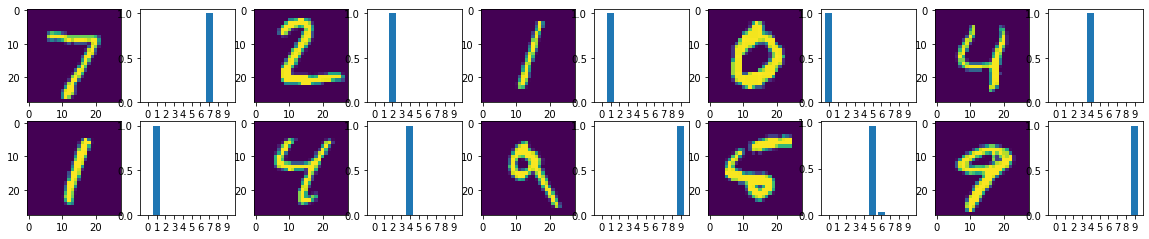

In [36]:
index = correct_mnist(pred, test_labels)
index_slice = index[:10]
plot_print(index_slice, pred, test_labels)

- CNN을 통해 correct 하게 예측된 case들 중 index 넘버가 작은 10 개의 case를 출력

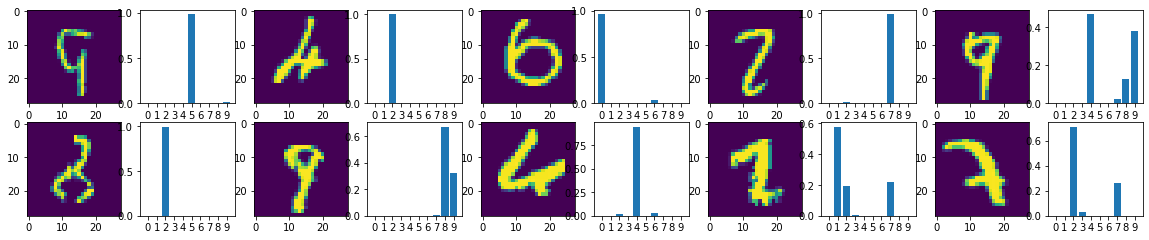

In [37]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
plot_print(index_slice, pred, test_labels)

- CNN을 통해 error가 발생한 case들 중 index 넘버가 작은 10 개의 case를 출력